In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [20]:
data_path = '/content/gdrive/My Drive/DS Project/datasets/deaths_trendLineCoeff.csv'
data = pd.read_csv(data_path)

In [22]:
data.columns = ['index','State/UnionTerrirory','TrendLineCoeff']
data.head()


,index,State/UnionTerrirory,TrendLineCoeff
0,0,Andhra Pradesh,27.855346
1,1,Himachal Pradesh,0.610519
2,2,Odisha,3.857515
3,3,Madhya Pradesh,11.014560
4,4,Nagaland,0.132035


In [24]:
#Creating the data 
x1 = np.array(data['index']) 
x2 = np.array(data['TrendLineCoeff']) 
x3 = np.array(data['State/UnionTerrirory'])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [25]:
max(x2),len(x1)

(179.94506644877194, 36)

In [31]:
states_dict = dict(zip(list(x1),list(x3)))
states_dict


{0: 'Andhra Pradesh',
 1: 'Himachal Pradesh',
 2: 'Odisha',
 3: 'Madhya Pradesh',
 4: 'Nagaland',
 5: 'Manipur',
 6: 'Delhi',
 7: 'Mizoram',
 8: 'Gujarat',
 9: 'Maharashtra',
 10: 'Andaman and Nicobar Islands',
 11: 'Jammu and Kashmir',
 12: 'Kerala',
 13: 'Meghalaya',
 14: 'Goa',
 15: 'West Bengal',
 16: 'Ladakh',
 17: 'Uttarakhand',
 18: 'Haryana',
 19: 'Karnataka',
 20: 'Puducherry',
 21: 'Assam',
 22: 'Rajasthan',
 23: 'Uttar Pradesh',
 24: 'Jharkhand',
 25: 'Arunachal Pradesh',
 26: 'Chhattisgarh',
 27: 'Tamil Nadu',
 28: 'Tripura',
 29: 'Dadar Nagar Haveli',
 30: 'Daman & Diu',
 31: 'Sikkim',
 32: 'Bihar',
 33: 'Telangana',
 34: 'Chandigarh',
 35: 'Punjab'}

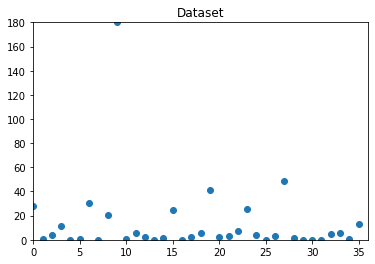

In [34]:


#Visualizing the data 
plt.plot() 
plt.xlim([0, 36]) 
plt.ylim([0, 180]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 


In [35]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(X) 
	kmeanModel.fit(X)	 
	
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / X.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / X.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 


In [36]:
for key,val in mapping1.items(): 
	print(str(key)+' : '+str(val)) 


1 : 20.184517740361528
2 : 13.915187348405837
3 : 9.942557067663435
4 : 6.7064400391528425
5 : 5.765637835553313
6 : 4.730946307030777
7 : 4.309515543292627
8 : 3.6828162525428434
9 : 3.3484193981716324


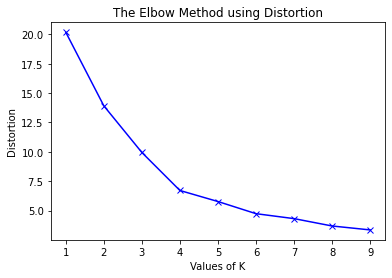

In [37]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [38]:
for key,val in mapping2.items(): 
	print(str(key)+' : '+str(val)) 


1 : 37900.81223923278
2 : 9257.74309087326
3 : 4613.521384981055
4 : 2250.0690506325564
5 : 1490.838312970575
6 : 1063.8708646921164
7 : 827.8209776727999
8 : 629.8237540005346
9 : 513.5136014393418


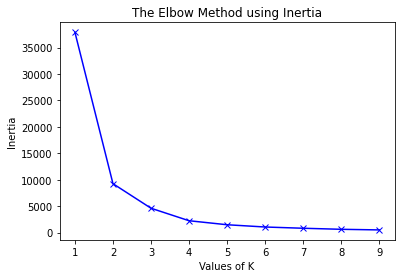

In [39]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


k=3??